In [132]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt

tensor([[[[122.,  68., 163.,  ..., 140., 233.,  29.],
          [138., 149.,  41.,  ...,  18.,  42.,  36.],
          [ 78.,  46., 216.,  ..., 206.,  37., 126.],
          ...,
          [128., 122., 137.,  ..., 196., 137., 174.],
          [183.,  88., 243.,  ..., 159.,  20.,  93.],
          [ 37., 179.,  72.,  ..., 136., 188., 160.]]]])

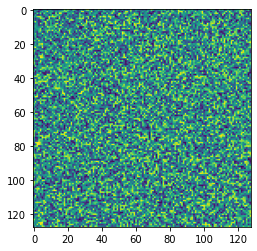

In [166]:
img = np.random.randint(256, size=(1,1,128,128))
plt.imshow(img[0,0])
img = torch.tensor(img, dtype=torch.float32)
img

In [189]:
def init(module, gain):
    nn.init.orthogonal_(module.weight.data, gain=gain)
    nn.init.constant_(module.bias.data, 0)
    return module

def init_(module):
    return init(module, nn.init.calculate_gain('relu'))

conv = nn.Sequential(
    # 128*128 -> 31*31
    init_(nn.Conv2d(1, 16, kernel_size=8, stride=4, padding=2)),
    nn.ReLU(),
    # 31*31 -> 15*15
    init_(nn.Conv2d(16, 32, kernel_size=4, stride=2)),
    nn.ReLU(),
    # 15*15 -> 13*13
    init_(nn.Conv2d(32, 32, kernel_size=3, stride=1)),
    nn.ReLU(),
    nn.Flatten(),
    # 16*13*13 -> 200
    init_(nn.Linear(32*13*13, 200)),
    nn.ReLU()
)


In [319]:
with torch.no_grad():
    print(conv(img).squeeze())

tensor([0.0000e+00, 1.6902e+02, 1.4252e+02, 4.1630e+01, 1.6056e+02, 6.6102e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.9923e+02, 0.0000e+00, 6.8221e+01,
        1.9229e+02, 2.5633e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7910e+02,
        0.0000e+00, 8.0656e+01, 2.1818e+02, 0.0000e+00, 2.5927e+02, 0.0000e+00,
        0.0000e+00, 1.3097e+02, 5.3839e+02, 0.0000e+00, 0.0000e+00, 4.0085e+02,
        7.5449e+01, 0.0000e+00, 0.0000e+00, 1.7469e+02, 0.0000e+00, 2.5472e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8790e+02, 2.7678e+02, 0.0000e+00,
        1.2025e+02, 2.0232e+02, 0.0000e+00, 2.4596e+02, 0.0000e+00, 0.0000e+00,
        1.3158e+02, 0.0000e+00, 2.4045e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.2135e+02, 1.7068e+02, 0.0000e+00, 1.3647e+02, 1.5298e-01, 0.0000e+00,
        1.0967e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0682e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.1967e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.4089e+02, 1.8152e+

In [191]:
inp = torch.randn(1,1,6,6)
m = nn.Sequential(
    nn.Conv2d(1, 1, kernel_size=2, stride=1),
    nn.Flatten()
)

In [305]:
inp.shape, inp.unsqueeze(0).shape

(torch.Size([1, 1, 6, 6]), torch.Size([1, 1, 1, 1, 6, 6]))

In [90]:
m(inp), m(inp).reshape(1,5,5)

(tensor([[-0.2797,  0.3857, -0.2242, -0.4814, -0.2109, -0.4082, -0.2232, -0.0527,
           0.0412,  0.6927, -0.1552, -0.0918, -0.0477, -0.1135, -0.2987, -0.1820,
           0.4787,  0.6969,  0.6111, -0.3233,  0.0336,  0.3475,  0.1964,  0.4412,
          -0.1381]], grad_fn=<ViewBackward>),
 tensor([[[-0.2797,  0.3857, -0.2242, -0.4814, -0.2109],
          [-0.4082, -0.2232, -0.0527,  0.0412,  0.6927],
          [-0.1552, -0.0918, -0.0477, -0.1135, -0.2987],
          [-0.1820,  0.4787,  0.6969,  0.6111, -0.3233],
          [ 0.0336,  0.3475,  0.1964,  0.4412, -0.1381]]],
        grad_fn=<ViewBackward>))

In [266]:
enhance = nn.Sequential(
    init_(nn.Linear(3,10)),
    nn.ReLU()
)

In [286]:
num = np.arange(-100,101)
pp = [torch.full([3], i, dtype=torch.float32) for i in num]

arr = np.vstack([enhance(p).detach().numpy() for p in pp])

arr

array([[ 0.       ,  0.       ,  0.       , ..., 12.462765 , 91.35191  ,
         5.748106 ],
       [ 0.       ,  0.       ,  0.       , ..., 12.338139 , 90.43839  ,
         5.690626 ],
       [ 0.       ,  0.       ,  0.       , ..., 12.21351  , 89.52487  ,
         5.6331387],
       ...,
       [46.5793   , 76.6105   , 39.732056 , ...,  0.       ,  0.       ,
         0.       ],
       [47.054604 , 77.392235 , 40.13749  , ...,  0.       ,  0.       ,
         0.       ],
       [47.5299   , 78.17397  , 40.542915 , ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)

In [287]:
arr.shape

(201, 10)

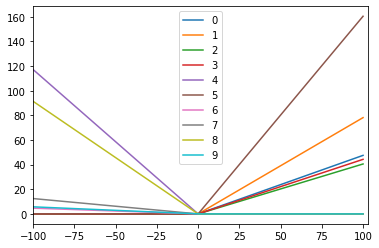

In [288]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(num[0], num[-1]+3)
for i in range(len(arr[0])):
    ax.plot(num, arr[:,i], label=i)
    
ax.legend()

In [292]:
def a(**kwarg):
    print(kwarg['asdf'])
    
a(**{'asdf':1})

1


In [311]:
np.expand_dims(np.array([1,1,1]), axis=0).shape

(1, 3)

In [316]:
torch.cat([torch.tensor([[1,1,1]]), torch.tensor([[2,2,2]])], axis=1)

tensor([[1, 1, 1, 2, 2, 2]])